# Quantitative Methods -5030 - Project 2 - Unemployment and Correlations
## By Nathan Smith

In [4]:

#1. Construct the data set that generates this scatter plot. The source is FRED, 4
#a great source for data on macroeconomics aggregates. When you download the data from FRED, it is helpful
#to save in .csv format and read into R using read.csv(). Make sure you have obtained the right
#series of data. You may need to transform data you can download into the variables that Taylor
#plots. It may be helpful to merge the data into one data frame (merge() is useful for this). Finally,
#for the later parts of this problem, make sure you download the entire series of observations, not
#just the ones that Taylor plots.

#2. Use the data set you constructed to reproduce Taylor’s other scatter plot. That is, produce a
#scatter plot using only the observations from Q1 of 1990 to Q3 of 2010.
#(a) As you do this, try to format the dates as dates (look up how to do this using the as.Date()
#function). This will help you to produce nice looking plots within R.

#3. Compare the scatter plot you obtain using the full data set to the one that Taylor reports.
#(a) For this comparison, you may want to use different plotting characters and colors, and the
#points() function to produce different plotting characters for different parts of the sample.

#4. Analyze the statistical relationship between seasonally-adjusted unemployment and government
#expenditures in a way that is informative and insightful. Some questions you should consider
#as you perform the analysis:

#(a) Is the correlation that Taylor presents in his scatter plot stable over time? In your analysis,
#you could compute the correlation separately decade. In addition to calculations, your
#analysis should include informative plots that support your main points.

#(b) Write up your comments concisely in a typed report.

#5. Write code – likely using for loops – to simulate the process of “cherry picking” in Wolfers’
#terminology, and use it to evaluate the seriousness of this part of the criticism. Some suggestions
#and refinements to guide your coding journey.

#(a) The code should generate two uncorrelated variables x and y (e.g., from a Normal distribution)
#over a time series of 256 quarters

#(b) Using these variables, use R to compute the correlation between x and y over the last 60
#quarters, over the last 61 quarters, over the last 62 quarters.... all the way until... over the
#last 256 quarters (the full sample).

#i. A researcher who is cherry picking the begin date will then select the lowest correlation.
#Have your code do this and store the maximum “cherry picked” correlation,
#but for comparison, you should also store the correlation over the entire sample (“not
#cherry picked”).

#(c) Repeat this process for 1000 possible “cherry picked” correlations and “not cherry picked”
#correlations. Store the output.

#i. Are the cherry picked correlations different than the not cherry picked correlations?
#Use both visual (plots to compare) and numerical evidence (t-tests).

#ii. Using the simulated cherry picked sample of correlations, conduct a t-test to evaluate
#whether Taylor’s computed negative correlation could be generated from this cherry
#picking process with zero underlying correlation

In [22]:
gce <- read.csv("https://www.dropbox.com/s/ryxgkzxw4ylowd5/GCE.csv?dl=1", stringsAsFactors=FALSE)
unemployment <- read.csv("https://www.dropbox.com/s/gsy7ce6lmzdoyf9/Unemployment.csv?dl=1", stringsAsFactors=FALSE)
actualgdp <- read.csv("https://www.dropbox.com/s/hkmaea7wew0q4dp/Actual%20GDP.csv?dl=1", stringsAsFactors=FALSE)

In [23]:
# This block of code organizes the data into a form that we can work with. "Maindata" is the entire
# data set from 1948 to 2018. "Moderndata" represents the data that Taylor observed in his findinds
actualgdp$GCE <- gce$GCE
DataTest <- actualgdp
actualgdp$GovP <- (actualgdp$GCE / actualgdp$GDP) * 100
maindata <- actualgdp[5:286,]
rownames(maindata) <- 1:nrow(maindata)
Unemployment <-  unemployment[1:844,]
for (i in 1:nrow(unemployment)){
  maindata$UnEmp <- unemployment$UNRATE[seq(1, 844, 3)]
}
modernData <- maindata[170:253,]


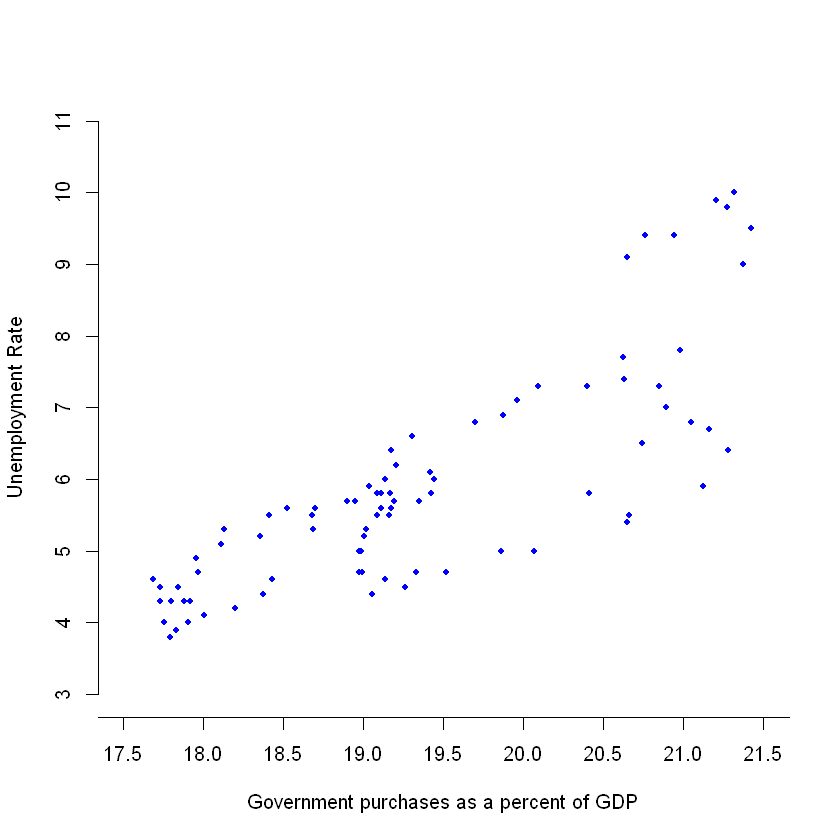

In [24]:
#------------ Question 2, Government purchases vs unemployment graph plot ---------------
# 
# 
# 

# This block of code re-creates Taylor's scatterplot of Government purchases as a percent of GDP vs unemployment
plot(modernData$GovP, modernData$UnEmp, xlim = c(17.5,21.5), ylim = c(3,11), axes = FALSE, cex=.65
     , col="blue", pch = 19, xlab = 'Government purchases as a percent of GDP'
     , ylab = 'Unemployment Rate')
axis(1, at=seq(floor(17.5), ceiling(21.5), .5))
axis(2, at=seq(floor(3), ceiling(11), 1))

[1] -0.02004673

[1] 0.8164415

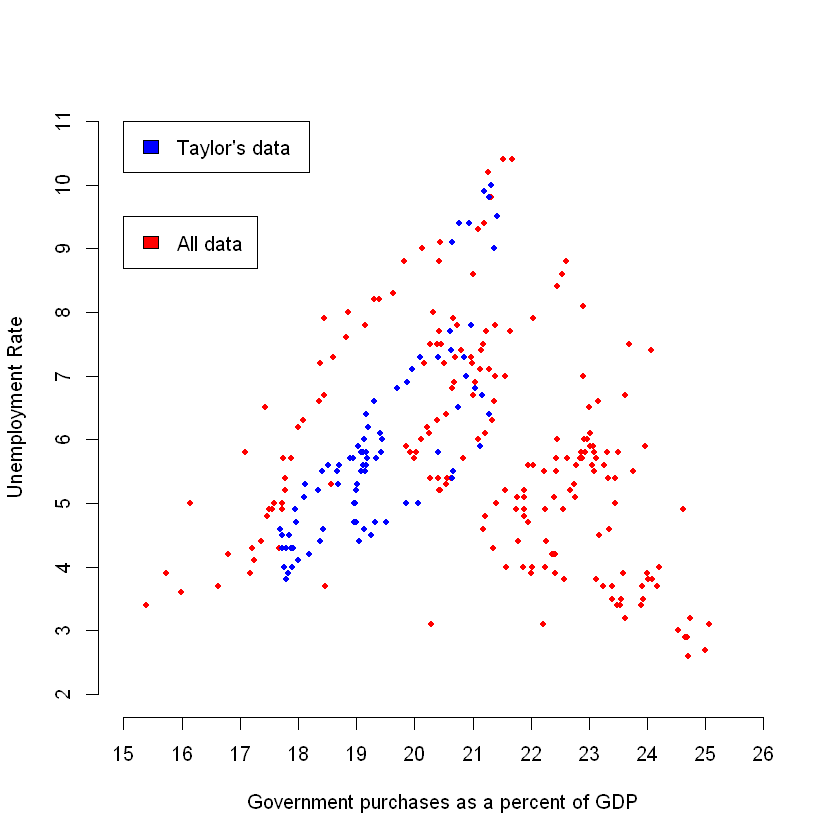

In [8]:
#----------------- Question 3, compare the two economists plots -------------------------
# 
# 
# 

# This block of code creates the master scatterplot with all available data
plot(maindata$GovP, maindata$UnEmp, xlim = c(15,26), ylim = c(2,11)
     , cex = .65, pch = 19, axes = FALSE
     , col="red", xlab = 'Government purchases as a percent of GDP'
     , ylab = 'Unemployment Rate')
axis(1, at=seq(floor(15), ceiling(26), 1))
axis(2, at=seq(floor(2), ceiling(11), 1))
points(modernData$GovP, modernData$UnEmp, col = 'blue', cex = .65, pch = 19)
legend(x=15, y=9.5, legend="All data", fill='red', col='red')
legend(x=15, y=11, legend="Taylor's data", fill='blue', col='blue')

# This block of code calculates the correlation of the two variables for all the data
cor(maindata$GovP, maindata$UnEmp)

# This block of code calculates the correlation of the two variables for the timeframe that Taylor is analyzing
cor(modernData$GovP, modernData$UnEmp)

# 

In [9]:
#---------------- Question 4, compare the realtionship over decades --------------------------
# 
# 
# 

# This block of code seperates out the data by decade. Printed below are the index positions

# index 1 through 9: 1940s
# index 10 through 49: 1950s
# index 50 through 89: 1960s
# index 90 through 129: 1970s
# index 130 through 169: 1980s
# index 170 through 209: 1990s
# index 210 through 249: 2000s
# index 250 through 282: 2010s

d1940 <- maindata[1:9,]
d1950 <- maindata[10:49,]
d1960 <- maindata[50:89,]
d1970 <- maindata[90:129,]
d1980 <- maindata[130:169,]
d1990 <- maindata[170:209,]
d2000 <- maindata[210:249,]
d2010 <- maindata[250:282,]


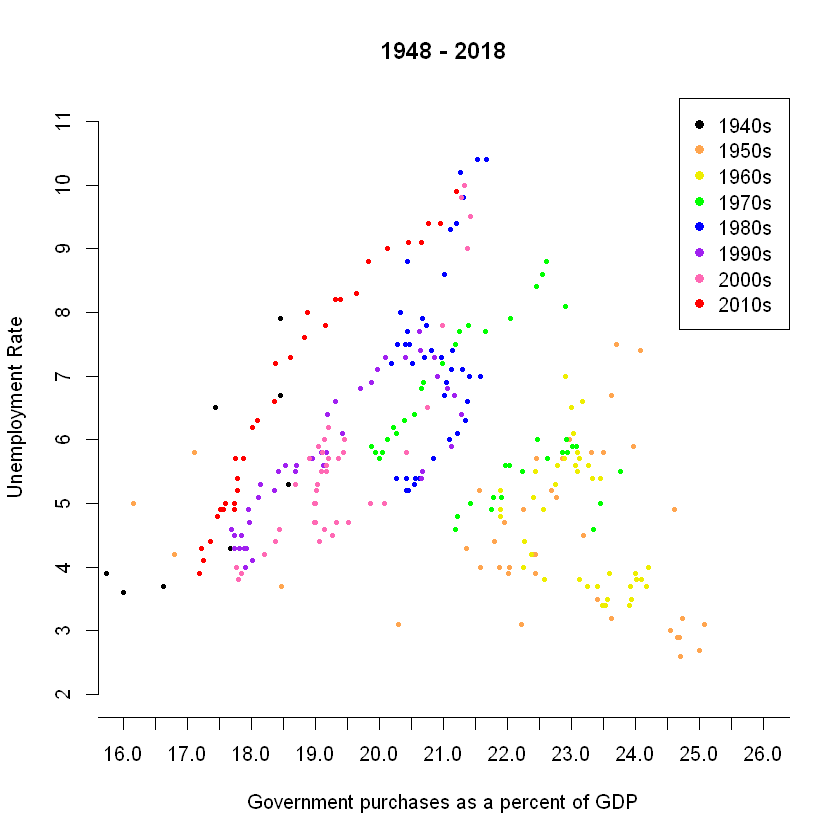

In [10]:
# This block of code creates a visualization of all the data color coded by decade

plot(d1940$GovP, d1940$UnEmp, cex = .5, pch = 19, col = 'black', xlim = c(16,26), ylim = c(2,11), axes = FALSE
     ,xlab = 'Government purchases as a percent of GDP', ylab = 'Unemployment Rate'
     , main = '1948 - 2018')
points(d1950$GovP, d1950$UnEmp, col = 'tan1', cex = .5, pch = 19)
points(d1960$GovP, d1960$UnEmp, col = 'yellow2', cex = .5, pch = 19)
points(d1970$GovP, d1970$UnEmp, col = 'green', cex = .5, pch = 19)
points(d1980$GovP, d1980$UnEmp, col = 'blue', cex = .5, pch = 19)
points(d1990$GovP, d1990$UnEmp, col = 'purple', cex = .5, pch = 19)
points(d2000$GovP, d2000$UnEmp, col = 'hotpink', cex = .5, pch = 19)
points(d2010$GovP, d2010$UnEmp, col = 'red', cex = .5, pch = 19)
axis(1, at=seq(floor(14), ceiling(27), .5))
axis(2, at=seq(floor(2), ceiling(11), 1))
legend('topright', legend = c('1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s')
       , col = c('black', 'tan1', 'yellow2', 'green', 'blue'
                 , 'purple', 'hotpink', 'red'), cex = 1, pch = 19)


In [12]:
# Question 5, cherry picking
# Part A. This is where we are creating the two uncorelated distributions

x <- rnorm(256, mean = (mean(maindata$UnEmp)), sd = sd(maindata$UnEmp))
y <- rnorm(256, mean = (mean(maindata$GovP)), sd = sd(maindata$GovP))


In [13]:
# Part B. This is where we are comparing the correltion between the two dsitributions using a for loop

question5 <- as.data.frame(x)
question5$y <- y
quarter <- 60:256
q5cor <- as.data.frame(quarter)
q5cor$cor <- NA
count <- 59
for(i in 1:nrow(q5cor)){
  q5cor$cor[i] <- cor(x[(256-count):256], y[(256-count):256])
  count <- count + 1
}

In [14]:
# Question 5 c here is our analysis of the cherry picking claims including our t tests

q5c <- as.data.frame(1:1000)
q5c$max <- NA
q5c$totalcor <- NA
question5 <- as.data.frame(x)
question5$y <- y
quarter <- 60:256
q5cor <- as.data.frame(quarter)
q5cor$cor <- NA

for(n in 1:nrow(q5c)){
  x <- rnorm(256, mean = (mean(maindata$UnEmp)), sd = sd(maindata$UnEmp))
  y <- rnorm(256, mean = (mean(maindata$GovP)), sd = sd(maindata$GovP))
  count <- 59
  for(i in 1:nrow(q5cor)){
    q5cor$cor[i] <- cor(x[(256-count):256], y[(256-count):256])
    count <- count + 1
  }
  q5c$max[n] <- max(q5cor$cor)
  q5c$totalcor[n] <- q5cor$cor[197]
}


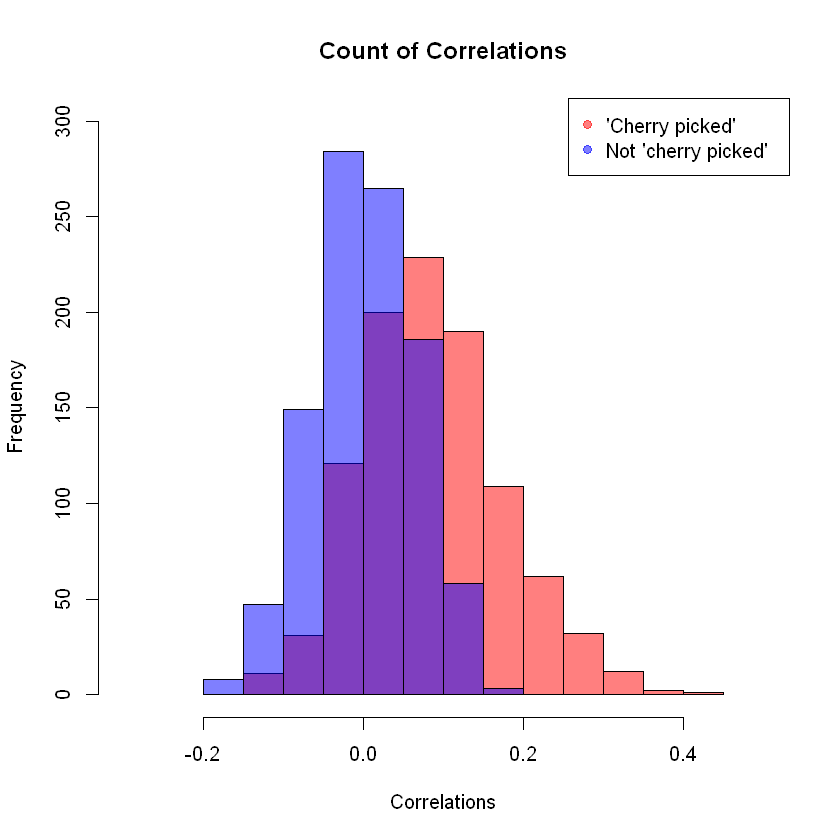

In [15]:
# Histogram of the cherry picked and non cherry picked distributions
hist(q5c$max, col=rgb(1,0,0,0.5), xlim = c(-.3,.5), ylim = c(0,300), xlab = 'Correlations'
     , ylab = 'Frequency', main = 'Count of Correlations')
hist(q5c$totalcor, add = TRUE, col=rgb(0,0,1,0.5))
legend('topright', legend = c('\'Cherry picked\'', 'Not \'cherry picked\'')
       , col = c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)), cex = 1, pch = 19)


In [16]:
# This t test is comparing the cherry picking distribution vs the non cherry picked distribution
t.test(q5c$max, q5c$totalco)
t.test(x = q5c$max, mu = mean(q5c$totalco))


	Welch Two Sample t-test

data:  q5c$max and q5c$totalco
t = 24.332, df = 1800, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07633694 0.08972194
sample estimates:
  mean of x   mean of y 
0.085575666 0.002546226 



	One Sample t-test

data:  q5c$max
t = 29.819, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.002546226
95 percent confidence interval:
 0.08011171 0.09103962
sample estimates:
 mean of x 
0.08557567 


In [17]:
# part 5 c ii

# This loop calculates the correlations of the real data in the same manor as we did above to 
# compare the real data to the cherry picked distribtion
realdata <- as.data.frame(quarter)
realdata$cor <- NA
count <- 59
for(i in 1:nrow(realdata)){
  realdata$cor[i] <- cor(maindata$UnEmp[(256-count):256], maindata$GovP[(256-count):256])
  count <- count + 1
}


In [18]:
# This t test evaluates the difference bewteen the acutal data and the Mu of the cherry picked results
t.test(realdata$cor, mu = mean(q5c$max))



	One Sample t-test

data:  realdata$cor
t = 13.039, df = 196, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.08557567
95 percent confidence interval:
 0.3763881 0.4800372
sample estimates:
mean of x 
0.4282126 


In [19]:

taylorcor <- rbind(d1990, d2000)
cor(taylorcor$GovP, taylorcor$UnEmp)

(.8-.08)/(.4282126/13.249)

[1] 0.8085365

[1] 22.27697